<a href="https://colab.research.google.com/github/MuhammadBilall/Lab01/blob/master/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [74]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(data)
print(data.shape)

def boostrap_mean(sample, sample_size, n_iterations):
  new_array = np.random.choice(sample, (n_iterations, sample_size), replace = True)
  print(new_array.shape,new_array)
  data_mean = np.mean(new_array)
  
  mean_array = np.array(new_array.mean(axis=1))
  #print(mean_array)
  lower = np.percentile(mean_array, 2.5)
  upper = np.percentile(mean_array, 97.5)
  #print(lower, upper)

  return data_mean, lower, upper


[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]
(14,)
(100, 14) [[ 5.  8.  8. ...  4. 22. 13.]
 [ 7.  2.  5. ... 10.  8. 13.]
 [22.  4.  9. ...  2. 10.  4.]
 ...
 [ 2.  9. 10. ...  8.  9.  8.]
 [ 2. 10. 13. ...  9.  7. 10.]
 [ 7.  4. 10. ...  8.  2. 20.]]
[ 8.78571429  9.07142857  6.42857143  9.92857143  8.07142857  8.42857143
  7.5         8.21428571  9.5         8.71428571 10.          7.07142857
  9.35714286  9.5        12.64285714  9.71428571 10.42857143 11.21428571
  9.5         9.57142857  7.85714286  7.71428571 10.42857143 10.21428571
  8.92857143  8.28571429  8.          8.42857143  9.42857143  9.57142857
  9.14285714 10.57142857  7.92857143  8.85714286  9.85714286  8.92857143
 13.21428571  6.57142857 10.35714286 10.78571429  6.35714286  8.78571429
  8.14285714  7.92857143  8.07142857  8.57142857  9.14285714  9.57142857
 10.42857143  8.5         9.5        11.42857143  7.85714286 10.35714286
  7.71428571 11.21428571  8.35714286  7.35714286  8.07142857 10.78571429
 11.

(9.095714285714285, 6.357142857142857, 11.575)

(100, 14) [[22. 22. 22. ...  9.  8.  9.]
 [ 9. 22. 20. ... 10.  2. 10.]
 [ 2.  5. 10. ... 22.  9.  2.]
 ...
 [10. 20. 10. ... 13. 10.  9.]
 [ 8.  8.  8. ... 13. 10.  2.]
 [ 8. 13. 22. ...  8. 20.  7.]]
[10.5         9.92857143  9.          9.78571429  8.85714286  7.5
 13.14285714  8.21428571  8.78571429 12.85714286  7.92857143 12.35714286
 10.          9.14285714  8.21428571  7.78571429 10.78571429  9.85714286
  6.21428571  9.85714286  9.57142857 12.14285714 10.71428571  7.07142857
 10.78571429  8.78571429  5.92857143  9.14285714  8.5         9.07142857
 10.21428571  7.64285714 10.35714286 10.28571429 10.          9.85714286
 11.35714286  8.78571429  9.78571429  8.14285714  8.35714286  8.92857143
 10.14285714  8.42857143  8.85714286 13.07142857  8.85714286  9.
  9.28571429  7.35714286  9.78571429  6.78571429  7.85714286  6.71428571
  7.64285714  9.07142857  8.28571429  8.85714286  8.5         9.
  9.71428571  8.85714286  8.85714286  7.71428571 11.07142857  9.
  7.92857143 10.35714286  

(0, 100000)

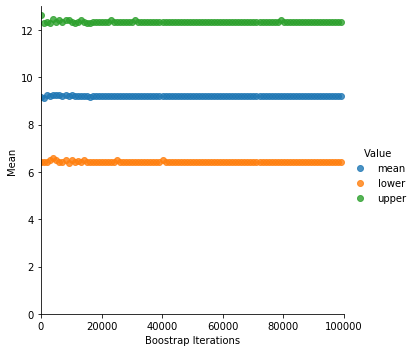

In [75]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')